In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import librosa as lr
import pyaudio as pa
import wave

In [97]:
wav, f = lr.load("./raw.wav", sr = 22050)
print(len(wav))
print(f)
print(len(wav)/f)
print(type(wav))
print(wav.shape)
print(wav[50000:100000])

5675560
22050
257.3950113378685
<class 'numpy.ndarray'>
(5675560,)
[-0.00011211 -0.0021804  -0.00634768 ... -0.00670852 -0.01352826
 -0.01687505]


In [84]:
def plotWav(wav, f, ratio, start, end, title, mode='t'):
    width, height = figaspect(ratio)
    fig = figure(figsize=(width,height))
    
    if mode == 't': #time
        startI = start * f
        endI = end * f
        Idx = np.arange(startI, endI)
        plot(Idx, wav[startI : endI])
        plt.title(title)
    elif mode == 'i': # index
#         startSec = start / f
#         endSec = end / f
#         secIdx = np.arange(startSec, endSec, 1/f)
        Idx = np.arange(start, end)
        plot(Idx, wav[start : end])
        plt.title(title)

In [6]:
def record(filename):
    CHUNK = 1024
    FORMAT = pa.paInt16
    CHANNELS = 1
    RATE = 22050
    RECORD_SECONDS = 60
    WAVE_OUTPUT_FILENAME = filename

    p = pa.PyAudio()

    stream = p.open(format=FORMAT,
                    channels=CHANNELS,
                    rate=RATE,
                    input=True,
                    frames_per_buffer=CHUNK)

    print("* recording")

    frames = []

    for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
        data = stream.read(CHUNK)
        frames.append(data)

    print("* done recording")

    stream.stop_stream()
    stream.close()
    p.terminate()
    
    wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
    wf.setnchannels(CHANNELS)
    wf.setsampwidth(p.get_sample_size(FORMAT))
    wf.setframerate(RATE)
    wf.writeframes(b''.join(frames))
    wf.close()

In [7]:
record("output.wav")

* recording
* done recording


In [72]:
wav_, f_ = lr.load("./output.wav", sr = None)
print(f_)

22050


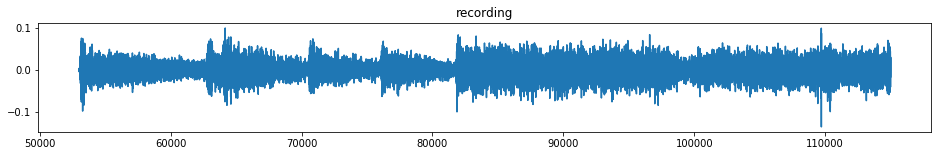

In [123]:
plotWav(wav_, f_, 0.1, 53000, 115000, "recording", 'i')
# plotWav(wav_, f_, 0.1, 2, 3, "recording")
# for time idx: 2-3
# 50000 - 65000
# 53000-54000
#53000-53200

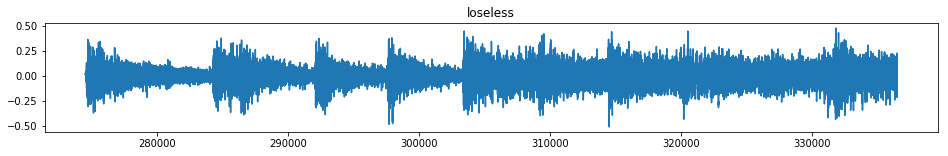

In [124]:
# plotWav(wav, f, 0.1, 12, 13, "loseless")
plotWav(wav, f, 0.1, 274520, 336520, "loseless", 'i')
# for time idx: 12-13
#274520-274720

In [127]:
import sys
import scipy.io.wavfile as sciwavf

def storeChunk(filename, chunk, f):
    sciwavf.write(filename, f, chunk)
    
# def playChunk(filename):
#     CHUNK = 1024
    
#     wf = wave.open(filename, 'rb')

#     p = pyaudio.PyAudio()

#     stream = p.open(format=p.get_format_from_width(wf.getsampwidth()),
#                     channels=wf.getnchannels(),
#                     rate=wf.getframerate(),
#                     output=True)

#     data = wf.readframes(CHUNK)

#     while data != '':
#         stream.write(data)
#         data = wf.readframes(CHUNK)

#     stream.stop_stream()
#     stream.close()

#     p.terminate()

In [128]:
storeChunk("recording1.wav", wav_, f_)

In [130]:
storeChunk("chunk_rec_1.wav", wav_[53000:115000], f_)
storeChunk("chunk_losless_1.wav", wav[274520:336520], f)